In [1]:
# Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Machine Learning Libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
#Data
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#df.info()

In [4]:
for col in df.columns:
    if df[col].count() < 1000: # arbitrary
        print(f"Dropping column: {col}")
        df.drop(col, axis=1, inplace=True)
        
df.info()

Dropping column: Alley
Dropping column: FireplaceQu
Dropping column: PoolQC
Dropping column: Fence
Dropping column: MiscFeature
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle  

In [5]:
#View to see which columns are worth keeping and which should drop.
cat_cols = []
for col in df:
    if df[col].dtype == object:
        if df[col].value_counts().values[0] < 1000:
            print(col)
            print(df[col].value_counts())
            print()
            cat_cols.append(col)

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    19

In [6]:
num_cols = []
for col in df.columns:
    if df[col].dtype != object:
        num_cols.append(col)

In [7]:
num_df = df.loc[:, num_cols]

num_df.drop(["Id", "YrSold"], axis=1, inplace=True)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [8]:
for col in num_df:
    if num_df[col].count() != 1460:
        num_df[col] = num_df[col].fillna(num_df[col].mean())
        
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [9]:
cat_df = df.loc[:, cat_cols]
cat_df.head()

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
0,Reg,CollgCr,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn
1,Reg,Veenker,1Story,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn
2,IR1,CollgCr,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn
3,IR1,Crawfor,2Story,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf
4,IR1,NoRidge,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn


In [11]:
#Combined all smaller cats into the other cat
for col in cat_df:
    if col != "Neighborhood":
        vals = cat_df[col].value_counts()
        
        for indx in vals.index:
            val = vals[indx]
            if val < 150:
                cat_df.loc[cat_df[col] == indx, col] = "Other"

In [13]:
neighs = sorted(cat_df["Neighborhood"].unique())

for i in range(len(neighs)):
    neigh = neighs[i]
    cat_df.loc[cat_df["Neighborhood"] ==neigh, "Neighborhood"] = i

In [14]:
cat_df.Neighborhood.value_counts()

12    225
5     150
17    113
7     100
21     86
8      79
16     77
19     74
14     73
20     59
3      58
6      51
11     49
15     41
23     38
9      37
4      28
22     25
18     25
10     17
0      17
2      16
24     11
13      9
1       2
Name: Neighborhood, dtype: int64

In [15]:
cat_df["Neighborhood"] = pd.to_numeric(cat_df.Neighborhood)
cat_df = pd.get_dummies(cat_df)

cat_df.head()

,Neighborhood,LotShape_IR1,LotShape_Other,LotShape_Reg,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,...,HeatingQC_TA,KitchenQual_Gd,KitchenQual_Other,KitchenQual_TA,GarageType_Attchd,GarageType_Detchd,GarageType_Other,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,5,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,24,0,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,5,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,6,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,15,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [16]:
#Combine dataframe
full_df = pd.concat([cat_df, num_df], axis =1)

full_df

,Neighborhood,LotShape_IR1,LotShape_Other,LotShape_Reg,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,5,0,0,1,0,0,1,0,0,0,...,548,0,61,0,0,0,0,0,2,208500
1,24,0,0,1,0,1,0,0,0,1,...,460,298,0,0,0,0,0,0,5,181500
2,5,1,0,0,0,0,1,0,0,0,...,608,0,42,0,0,0,0,0,9,223500
3,6,1,0,0,0,0,1,0,0,0,...,642,0,35,272,0,0,0,0,2,140000
4,15,1,0,0,0,0,1,0,0,0,...,836,192,84,0,0,0,0,0,12,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8,0,0,1,0,0,1,0,0,0,...,460,0,40,0,0,0,0,0,8,175000
1456,14,0,0,1,0,1,0,0,0,0,...,500,349,0,0,0,0,0,0,2,210000
1457,6,0,0,1,0,0,1,0,0,0,...,252,0,60,0,0,0,0,2500,5,266500
1458,12,0,0,1,0,1,0,0,0,1,...,240,366,0,112,0,0,0,0,4,142125


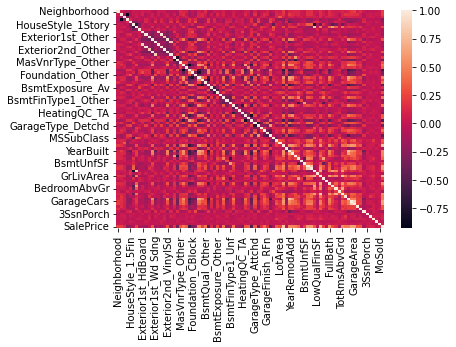

In [17]:
corrs = full_df.corr()
sns.heatmap(corrs)
plt.show()

In [21]:
abs(corrs["SalePrice"]).sort_values(ascending=False).head(20)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
ExterQual_TA        0.589044
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
KitchenQual_TA      0.519298
YearRemodAdd        0.507101
Foundation_PConc    0.497734
MasVnrArea          0.475241
GarageYrBlt         0.470177
Fireplaces          0.466929
ExterQual_Gd        0.452466
BsmtQual_TA         0.452394
BsmtFinType1_GLQ    0.434597
Name: SalePrice, dtype: float64

In [22]:
drop_cols = ["PoolArea", "MSSubClass", "OverallCond", "MoSold", "3SsnPorch", "LowQualFinSF", "MiscVal", "BsmtHalfBath", "BsmtFinSF2"]
full_df = full_df.drop(drop_cols, axis=1)

In [24]:
#Target is saleprice
X = full_df.drop("SalePrice", axis=1).values
y = full_df.loc[:, "SalePrice"].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.75 : 0.25


In [30]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    # predict
    train_preds = model.predict(X_train) 
    test_preds = model.predict(X_test) 
    
    # Metrics on the Training Set (should only be compared to the test metrics for the same model)
    r2 = r2_score(y_train, train_preds)
    mse = mean_squared_error(y_train, train_preds)
    mae = mean_absolute_error(y_train, train_preds)

    output = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    R2: {r2}
    MSE: {mse}
    RMSE: {np.sqrt(mse)}
    MAE: {mae}
    """
    print(output)
    print()
    
    # Metrics on the Testing Set
    r2 = r2_score(y_test, test_preds)
    mse = mean_squared_error(y_test, test_preds)
    mae = mean_absolute_error(y_test, test_preds)

    output = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    R2: {r2}
    MSE: {mse}
    RMSE: {np.sqrt(mse)}
    MAE: {mae}
    """
    print(output)
    print()
    
    # predicted vs actual plot
    plt.scatter(test_preds, y_test)
    plt.plot(y_test, y_test)
    plt.xlabel("Predictions")
    plt.ylabel("Actual")
    plt.title("Predicted vs Actual Plot")
    plt.show()
    print()
    
    # Residual Plot
    resid = y_test - test_preds

    plt.scatter(test_preds, resid)
    plt.hlines(0, 0, max(test_preds))
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.xlim(0, max(test_preds))
    plt.show()


    METRICS FOR THE TRAINING SET:
    ----------------------------
    R2: 0.8341275220953974
    MSE: 1007085648.2815684
    RMSE: 31734.612779764124
    MAE: 19982.888091323337
    


    METRICS FOR THE TESTING SET:
    ----------------------------
    R2: 0.8440435296127902
    MSE: 1092523273.7744105
    RMSE: 33053.33982783601
    MAE: 21722.404428405378
    



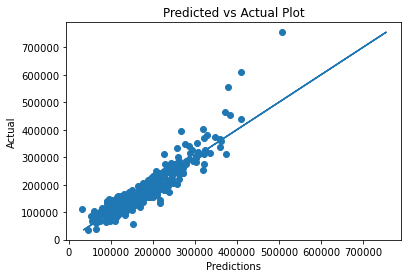

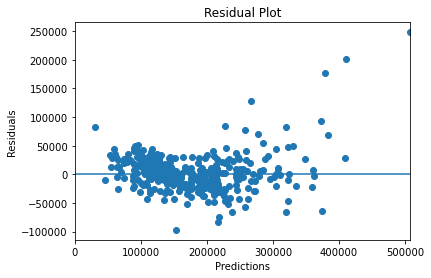

In [34]:
#Linear, easiest model

# init the model
lr = LinearRegression()
evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    R2: 0.834112437870918
    MSE: 1007177231.3228335
    RMSE: 31736.055698886616
    MAE: 19957.068715882968
    


    METRICS FOR THE TESTING SET:
    ----------------------------
    R2: 0.844485420752458
    MSE: 1089427689.7735462
    RMSE: 33006.47951196168
    MAE: 21636.72462091689
    



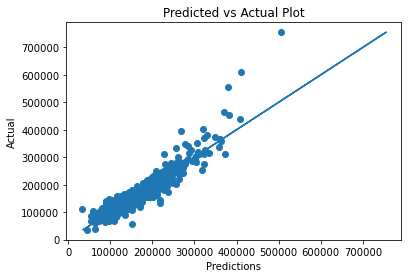

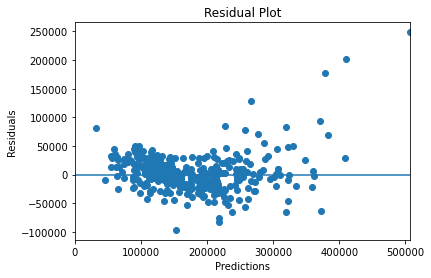

In [35]:
ridge = Ridge()
evaluateModel(ridge, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    R2: 0.8341271631248828
    MSE: 1007087827.7513521
    RMSE: 31734.64711874629
    MAE: 19979.3349248218
    


    METRICS FOR THE TESTING SET:
    ----------------------------
    R2: 0.8440541455787249
    MSE: 1092448905.6521482
    RMSE: 33052.21483731685
    MAE: 21714.07051522783
    



C:\Users\19722\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.958e+11, tolerance: 6.648e+08
  model = cd_fast.enet_coordinate_descent(


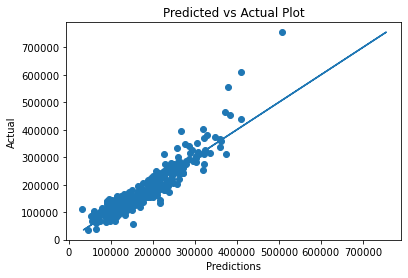

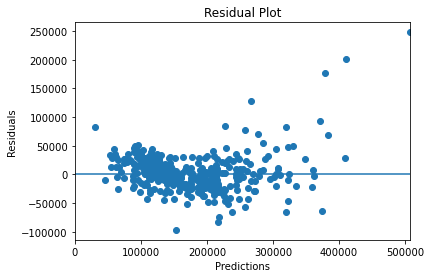

In [33]:
lasso = Lasso()
evaluateModel(lasso, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    R2: 0.799202939524925
    MSE: 1219128335.0687985
    RMSE: 34916.018316365895
    MAE: 20367.441908462653
    


    METRICS FOR THE TESTING SET:
    ----------------------------
    R2: 0.8349027229235529
    MSE: 1156557449.6202075
    RMSE: 34008.19680048043
    MAE: 20863.469838425164
    



C:\Users\19722\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.969e+11, tolerance: 6.648e+08
  model = cd_fast.enet_coordinate_descent(


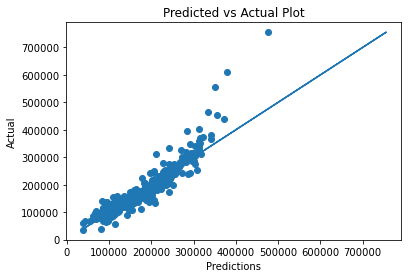

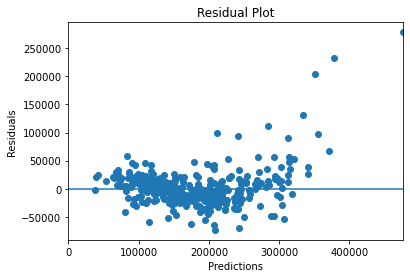

In [36]:
#Good model, but garbage to plot.
#Slight signs of possible overfitting.
en = ElasticNet()
evaluateModel(en, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    R2: 0.9767654806709679
    MSE: 141067109.24307993
    RMSE: 11877.167559779558
    MAE: 6705.632045662101
    


    METRICS FOR THE TESTING SET:
    ----------------------------
    R2: 0.8881760265216816
    MSE: 783361493.676216
    RMSE: 27988.595778927818
    MAE: 17445.359452054796
    



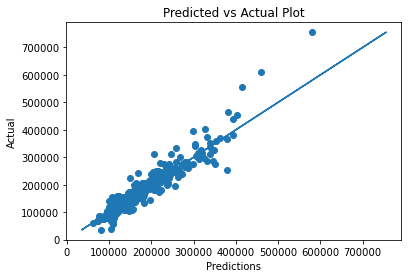

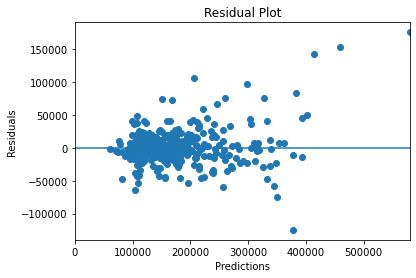

In [37]:
#Tree models
rf = RandomForestRegressor(random_state=42)
evaluateModel(rf, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    R2: 0.8668178639884567
    MSE: 808608031.1759026
    RMSE: 28436.034026845282
    MAE: 22075.297166076773
    


    METRICS FOR THE TESTING SET:
    ----------------------------
    R2: 0.8317545487060647
    MSE: 1178611382.9643195
    RMSE: 34330.910022373704
    MAE: 24284.311753908718
    



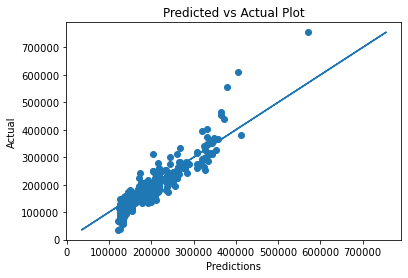

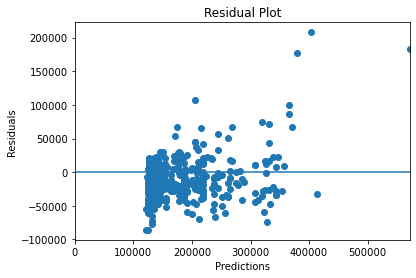

In [38]:
#Worse than linear

ada = AdaBoostRegressor()
evaluateModel(ada, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    R2: 0.9998687508588097
    MSE: 796871.9591810392
    RMSE: 892.6768503669394
    MAE: 619.4941388413242
    


    METRICS FOR THE TESTING SET:
    ----------------------------
    R2: 0.8646139164901803
    MSE: 948421356.3721074
    RMSE: 30796.450385914726
    MAE: 19158.9104880137
    



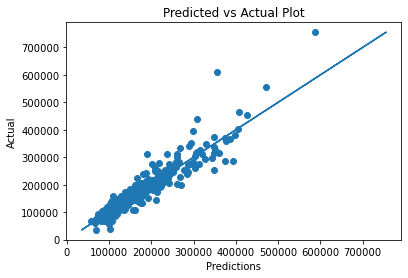

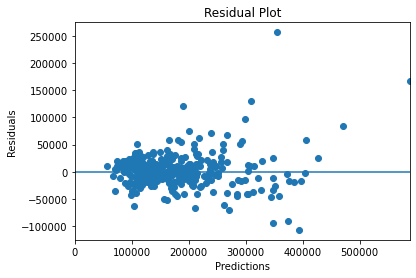

In [41]:
#Signs of overfitting in R2 of training set
xgb = XGBRegressor(random_state=42)
evaluateModel(xgb, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    R2: 0.9765536494005136
    MSE: 142353231.17859796
    RMSE: 11931.187333144928
    MAE: 5680.4027074323685
    


    METRICS FOR THE TESTING SET:
    ----------------------------
    R2: 0.8869052039862717
    MSE: 792263998.2874395
    RMSE: 28147.18455347603
    MAE: 17372.225998471335
    



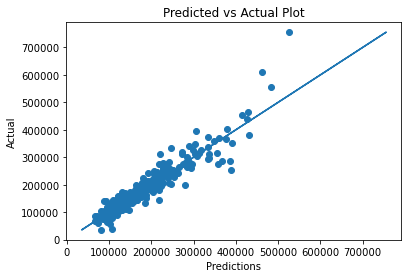

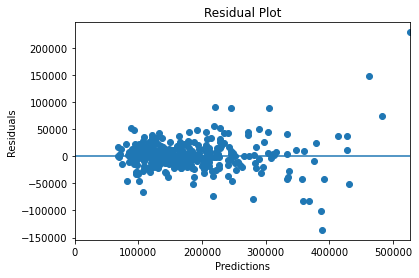

In [42]:
#Very close to the RF model
#Better than RF in the testing set

lgb = LGBMRegressor(random_state=42)
evaluateModel(lgb, X_train, X_test, y_train, y_test)

In [ ]:
#LGB model is the chosen model

In [43]:
#Shows the bigger the house the more it sales for
#The year built is also high rank importance
#Looking at .tail you'll see lot shape, garage type don't matter

features = full_df.drop("SalePrice", axis=1).columns

imp = lgb.feature_importances_

pd.DataFrame(list(zip(features, imp)), columns=["Feature", "Importance"]).sort_values(by="Importance", ascending=False).head(20)

,Feature,Importance
61,GrLivArea,309
58,TotalBsmtSF,236
51,LotArea,224
56,BsmtFinSF1,194
71,GarageArea,187
59,1stFlrSF,187
53,YearBuilt,139
73,OpenPorchSF,119
54,YearRemodAdd,117
0,Neighborhood,115


In [44]:
import pickle

lgb_final = LGBMRegressor(random_state=42)
lgb_final.fit(X, y)

pickle.dump(lgb_final, open('ames_house_price.pkl', 'wb'))


In [45]:
#Needs to be cleaned to match final_df
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [46]:
for col in test.columns:
    if test[col].count() < 1000: # arbitrary
        print(f"Dropping column: {col}")
        test.drop(col, axis=1, inplace=True)
        
cat_cols = []
for col in test:
    if test[col].dtype == object:
        if test[col].value_counts().values[0] < 1000:
            print(col)
            print(test[col].value_counts())
            print()
            cat_cols.append(col)
            
num_cols = []
for col in test.columns:
    if test[col].dtype != object:
        num_cols.append(col)
    
num_df = test.loc[:, num_cols]
ids = num_df.Id.values
num_df.drop(["Id", "YrSold"], axis=1, inplace=True)
        
for col in num_df:
    if num_df[col].count() != 1460:
        num_df[col] = num_df[col].fillna(num_df[col].mean())
        
cat_df = test.loc[:, cat_cols]
for col in cat_df:
    if col != "Neighborhood":
        vals = cat_df[col].value_counts()
        
        for indx in vals.index:
            val = vals[indx]
            if val < 150:
                cat_df.loc[cat_df[col] == indx, col] = "Other"
                
neighs = sorted(cat_df["Neighborhood"].unique())

for i in range(len(neighs)):
    neigh = neighs[i]
    cat_df.loc[cat_df["Neighborhood"] == neigh, "Neighborhood"] = i
    
cat_df["Neighborhood"] = pd.to_numeric(cat_df.Neighborhood)
cat_df = pd.get_dummies(cat_df)

full_test = pd.concat([cat_df, num_df], axis=1)

drop_cols = ["PoolArea", "MSSubClass", "OverallCond", "MoSold", "3SsnPorch", "LowQualFinSF", "MiscVal", "BsmtHalfBath", "BsmtFinSF2"]
full_test = full_test.drop(drop_cols, axis=1)
full_test.columns

Dropping column: Alley
Dropping column: FireplaceQu
Dropping column: PoolQC
Dropping column: Fence
Dropping column: MiscFeature
LotShape
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64

Neighborhood
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

HouseStyle
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, 

Index(['Neighborhood', 'LotShape_IR1', 'LotShape_Other', 'LotShape_Reg',
       'HouseStyle_1.5Fin', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_Other', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Other', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Other', 'ExterQual_Gd',
       'ExterQual_Other', 'ExterQual_TA', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_Other', 'Foundation_PConc',
       'BsmtQual_Gd', 'BsmtQual_Other', 'BsmtQual_TA', 'BsmtExposure_Av',
       'BsmtExposure_No', 'BsmtExposure_Other', 'BsmtFinType1_ALQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_Other', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_Other',
       'HeatingQC_TA', 'KitchenQual_Gd', 'KitchenQual_Other', 'KitchenQual_TA',

In [48]:
#Drop two missing columns
full_test.drop(["Foundation_BrkTil", "BsmtFinType1_Rec"], axis=1, inplace=True)

In [51]:
preds = lgb_final.predict(full_test)

new = pd.DataFrame()
new["Id"] = ids
new["SalePrice"] =preds

new.head()

,Id,SalePrice
0,1461,134534.392511
1,1462,153535.492126
2,1463,189792.767151
3,1464,184161.059260
4,1465,197701.466807


In [52]:
new.to_csv("BH_solutions.csv", index=False)